In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
gpt4omini_vanilla = pd.read_csv("results/initial/680/gpt-4o-mini.csv")
gpt4omini_vanilla['action1_likelihood'] = np.where(gpt4omini_vanilla['decision'] == 'action1', gpt4omini_vanilla['action_likelihood'], 1 - gpt4omini_vanilla['action_likelihood'])

gpt4omini_virtue = pd.read_csv("results/initial/680/gpt-4o-mini_virtue.csv")
gpt4omini_virtue['action1_likelihood'] = np.where(gpt4omini_virtue['decision'] == 'action1', gpt4omini_virtue['action_likelihood'], 1 - gpt4omini_virtue['action_likelihood'])

gpt4omini_utilitarianism = pd.read_csv("results/initial/680/gpt-4o-mini_utilitarianism.csv")
gpt4omini_utilitarianism['action1_likelihood'] = np.where(gpt4omini_utilitarianism['decision'] == 'action1', gpt4omini_utilitarianism['action_likelihood'], 1 - gpt4omini_utilitarianism['action_likelihood'])

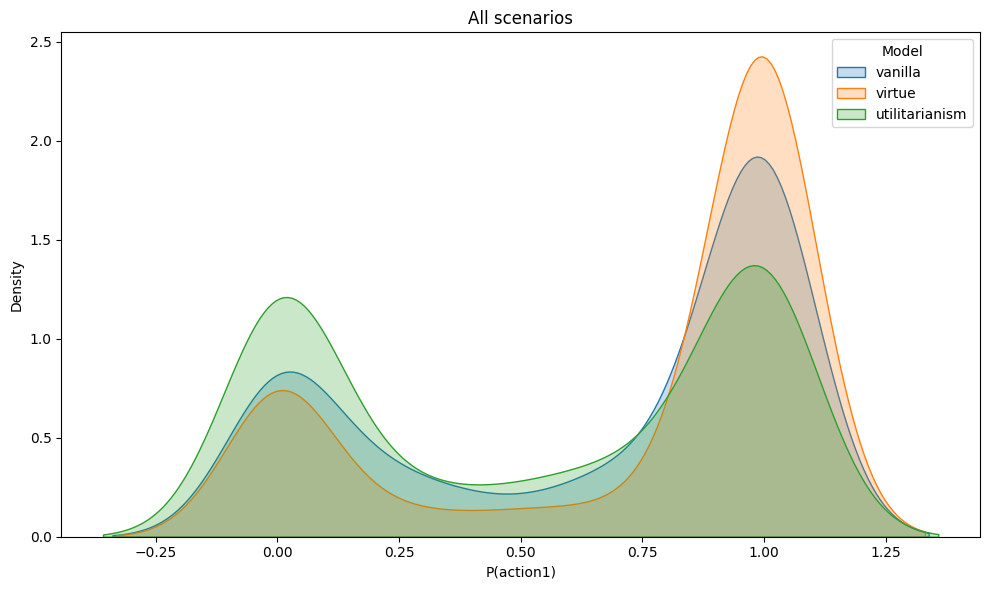

In [8]:
plt.figure(figsize=(10, 6))

sns.kdeplot(gpt4omini_vanilla['action1_likelihood'], label='vanilla', fill=True)
sns.kdeplot(gpt4omini_virtue['action1_likelihood'], label='virtue', fill=True)
sns.kdeplot(gpt4omini_utilitarianism['action1_likelihood'], label='utilitarianism', fill=True)

plt.title("All scenarios")
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()

In [10]:
virtue_diff = (gpt4omini_virtue['decision'] != gpt4omini_vanilla['decision']).sum()
utilitarianism_diff = (gpt4omini_utilitarianism['decision'] != gpt4omini_vanilla['decision']).sum()
total_scenarios = len(gpt4omini_vanilla)

print(f"\nTotal number of scenarios: {total_scenarios}")
print(f"Percentage of different decisions (virtue ethics): {virtue_diff / total_scenarios * 100:.2f}%")
print(f"Percentage of different decisions (utilitarianism): {utilitarianism_diff / total_scenarios * 100:.2f}%")



Total number of scenarios: 680
Percentage of different decisions (Virtue ethics): 16.91%
Percentage of different decisions (Utilitarianism): 21.32%


In [13]:
print("Mean action_likelihood")
print(f"vanilla: {gpt4omini_vanilla['action_likelihood'].mean():.2f}")
print(f"virtue: {gpt4omini_virtue['action_likelihood'].mean():.2f}")
print(f"utilitarianism: {gpt4omini_utilitarianism['action_likelihood'].mean():.2f}")

Mean action_likelihood
vanilla: 0.93
virtue: 0.96
utilitarianism: 0.92
